# Challenge 1
Explorar las ofertas relámpago, ¿qué insights
puedes generar?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ofertas_relampago.csv')

In [3]:
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


## Checking missing values

In [4]:
df.isna().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

<AxesSubplot:>

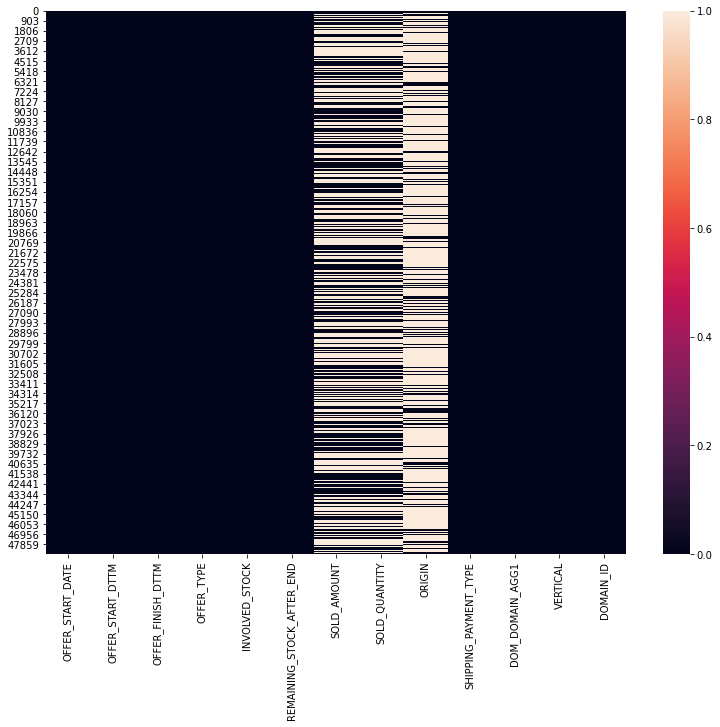

In [27]:
plt.figure(figsize=(13,10))
sns.heatmap(df.isna())

When SOLD_AMOUNT is missing so is SOLD_QUANTITY. Indicating that its absence probably means that no product of that row were actually bought.

## Understanding some distributions and categorical values

In [28]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


The negative numbers in REMAINING_STOCK_AFTER_END must be 

In [29]:
df['OFFER_TYPE'].value_counts()

lightning_deal    48746
Name: OFFER_TYPE, dtype: int64

In [30]:
df['SHIPPING_PAYMENT_TYPE'].value_counts()

free_shipping    26658
none             22088
Name: SHIPPING_PAYMENT_TYPE, dtype: int64

In [31]:
df['ORIGIN'].value_counts()

A    11316
Name: ORIGIN, dtype: int64

In [24]:
df['VERTICAL'].value_counts()

APP & SPORTS       13241
HOME & INDUSTRY    11011
CE                  8629
BEAUTY & HEALTH     7150
CPG                 2714
T & B               2624
ACC                 2573
ENTERTAINMENT        525
OTHERS               279
Name: VERTICAL, dtype: int64

In [22]:
# too big to print out
df['DOM_DOMAIN_AGG1'].nunique()

36

In [25]:
# too big to print out
df['DOMAIN_ID'].nunique()

1266

In [4]:
df[(df['INVOLVED_STOCK'] - df['SOLD_QUANTITY'] != df['REMAINING_STOCK_AFTER_END']) & df['SOLD_QUANTITY'].notna()]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
33,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,11,26.82,5.0,NaN,free_shipping,APPAREL,APP & SPORTS,MLM-BLOUSES
37,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 21:00:00+00:00,lightning_deal,10,8,13.34,3.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-MUGS
93,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:09+00:00,lightning_deal,10,9,13.58,2.0,NaN,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
99,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 19:28:55+00:00,lightning_deal,7,-3,15.57,6.0,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
153,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:03+00:00,lightning_deal,5,3,24.99,3.0,NaN,free_shipping,FOOTWEAR,APP & SPORTS,MLM-SANDALS_AND_FLIP_FLOPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48489,2021-06-19,2021-06-19 10:00:00+00:00,2021-06-19 18:00:00+00:00,lightning_deal,30,26,90.40,1.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-FRAME_POOLS
48490,2021-06-19,2021-06-19 10:00:00+00:00,2021-06-19 18:00:00+00:00,lightning_deal,30,26,271.20,3.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-FRAME_POOLS
48570,2021-06-19,2021-06-19 19:00:00+00:00,2021-06-20 01:00:05+00:00,lightning_deal,5,5,5.21,4.0,NaN,none,SPORTS,APP & SPORTS,MLM-KINESIOLOGY_TAPES
48628,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:00+00:00,lightning_deal,30,27,9.61,4.0,A,none,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-ANGLE_FINDERS


In [6]:
n_inconsistence = df[(df['INVOLVED_STOCK'] - df['SOLD_QUANTITY'] != df['REMAINING_STOCK_AFTER_END']) & df['SOLD_QUANTITY'].notna()].shape[0]
n_total = df.shape[0]
print(f'{(n_inconsistence/n_total)*100:.1f}% of the data do not obey the rule')

6.1% of the data do not obey the rule


Above, it is shown that 6.1% of the data do not obey 'INVOLVED_STOCK' - 'SOLD_QUANTITY' = 'REMAINING_STOCK_AFTER_END', a inconsistence in the data. 

In [3]:
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

In [4]:
df['duration'] = df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']

In [5]:
# Convert duration to minutes
df['duration'] = df['duration'].dt.total_seconds()/60

In [8]:
df.query('duration>0')['duration'].describe()

count    47432.000000
mean       351.988898
std        114.804745
min          0.016667
25%        360.000000
50%        360.050000
75%        360.533333
max       6285.150000
Name: duration, dtype: float64

The duration of the flash promotions range between 1 second to 105 hours, with the majority of them being around 6hrs.

Next, I am going to try to find interesting relationships between data given.

## Some insights

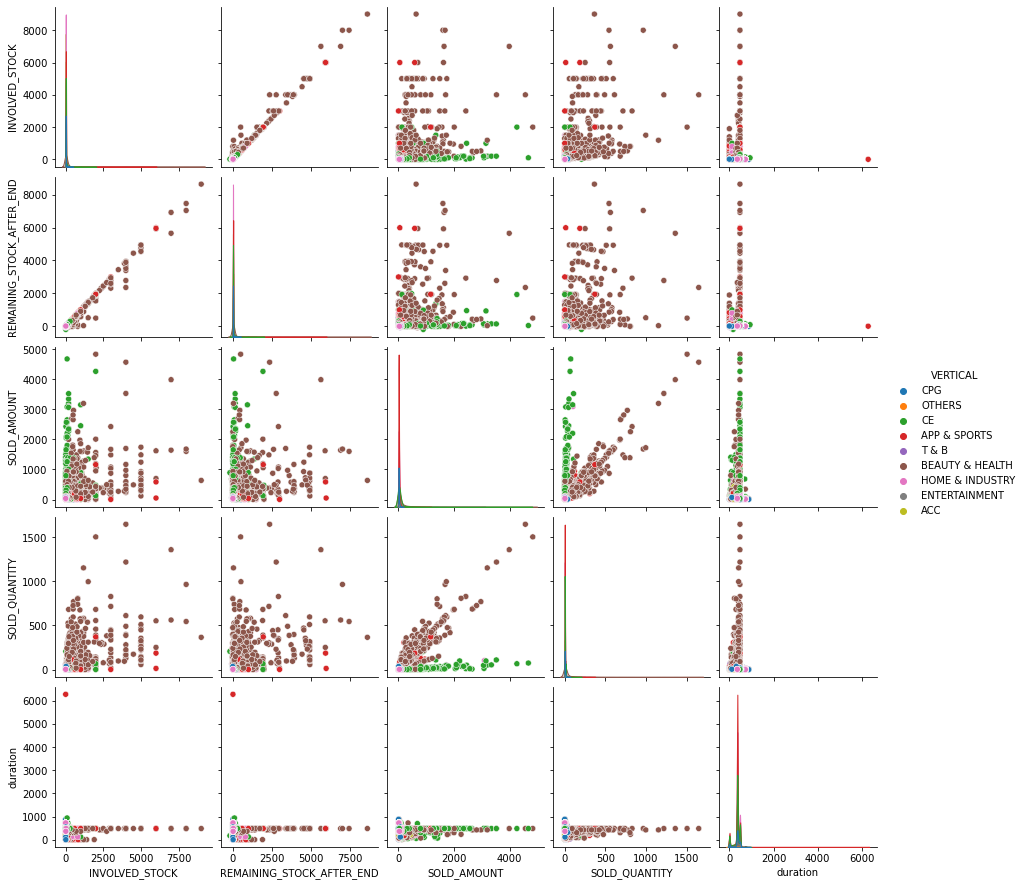

In [62]:
sns.pairplot(df,hue='VERTICAL')

The SOLD_QUANTITY and SOLD_AMOUNT relationship in the CE Vertical seams to be diverged from the rest of the verticals.

I believe that it probably has more expensive products than the other verticals.

In [6]:
df['amount_by_qty'] = df['SOLD_AMOUNT']/df['SOLD_QUANTITY']

(0.0, 100.0)

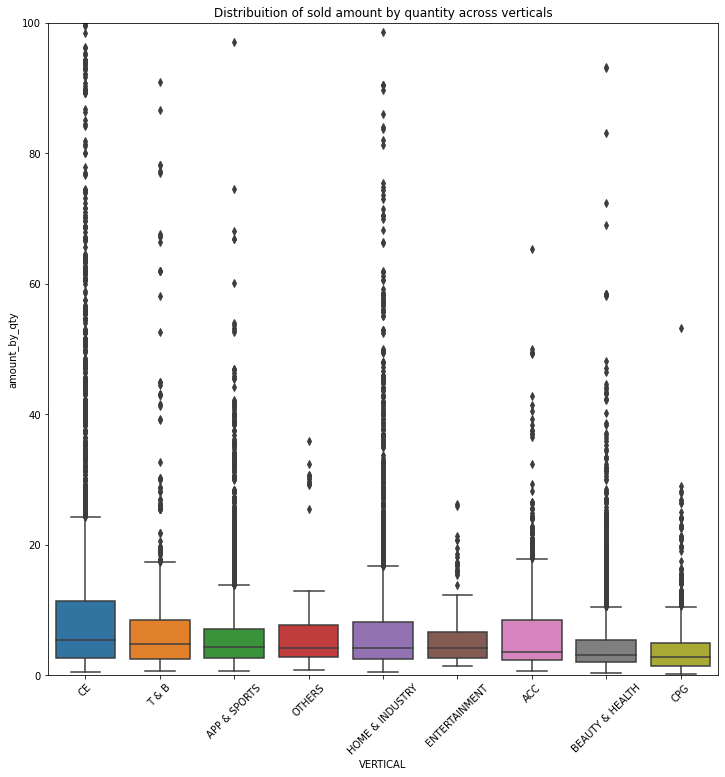

In [10]:
my_order = df.groupby(by=["VERTICAL"])["amount_by_qty"].median().sort_values().iloc[::-1].index

plt.figure(figsize=(12,12))
plt.xticks(rotation=45)
sns.boxplot(x="VERTICAL", y="amount_by_qty",data=df,order=my_order)
plt.title('Distribuition of sold amount by quantity across verticals')
plt.ylim([0,100])

In [10]:
df.query('VERTICAL=="CE"')['DOMAIN_ID'].value_counts()

MLM-HEADPHONES                      761
MLM-SMARTWATCHES                    390
MLM-CELLPHONE_COVERS                371
MLM-COMPUTER_MICE                   349
MLM-DATA_CABLES_AND_ADAPTERS        306
                                   ... 
MLM-NOTEBOOK_CASES                    1
MLM-HARD_DRIVE_AND_SSD_CADDIES        1
MLM-MEGAPHONES                        1
MLM-LAPTOP_BRIEFCASES                 1
MLM-CELLPHONE_CAMERA_ATTACHMENTS      1
Name: DOMAIN_ID, Length: 185, dtype: int64

The CE Vertical indeed has more expensive products. Tech related products are known to be pricier.

In [7]:
df['frac_sold'] = df['SOLD_QUANTITY'] / df['INVOLVED_STOCK']

(0.0, 2.0)

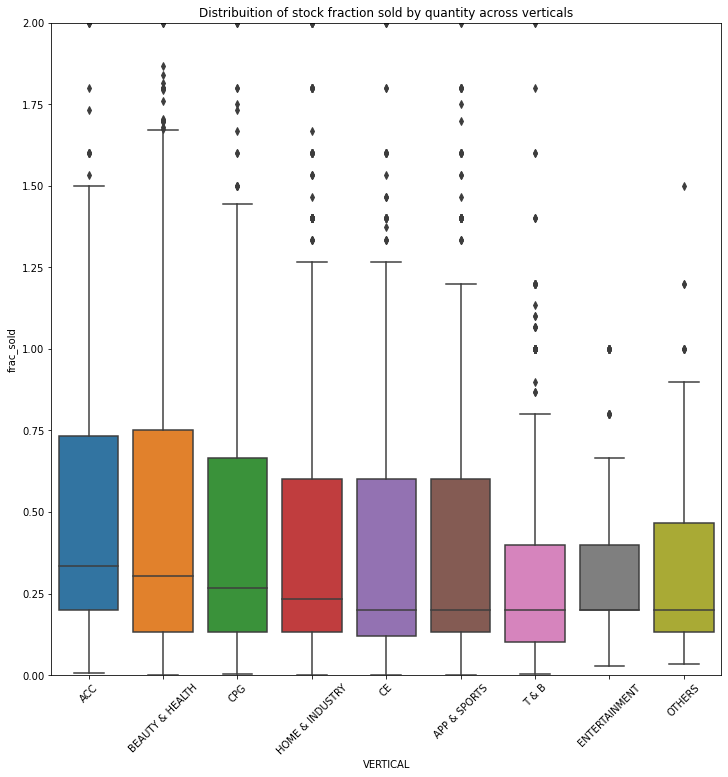

In [8]:
my_order = df.groupby(by=["VERTICAL"])["frac_sold"].mean().sort_values().iloc[::-1].index

plt.figure(figsize=(12,12))
plt.xticks(rotation=45)
sns.boxplot(x="VERTICAL", y="frac_sold",data=df,order=my_order)
plt.title('Distribuition of stock fraction sold by quantity across verticals')
plt.ylim([0,2])

The above graphic ranks verticals by median in the performance on stock bought.

The **ACC** vertical had the highest median of fraction of stock bought and **Others** the lowest.

(0.0, 900.0)

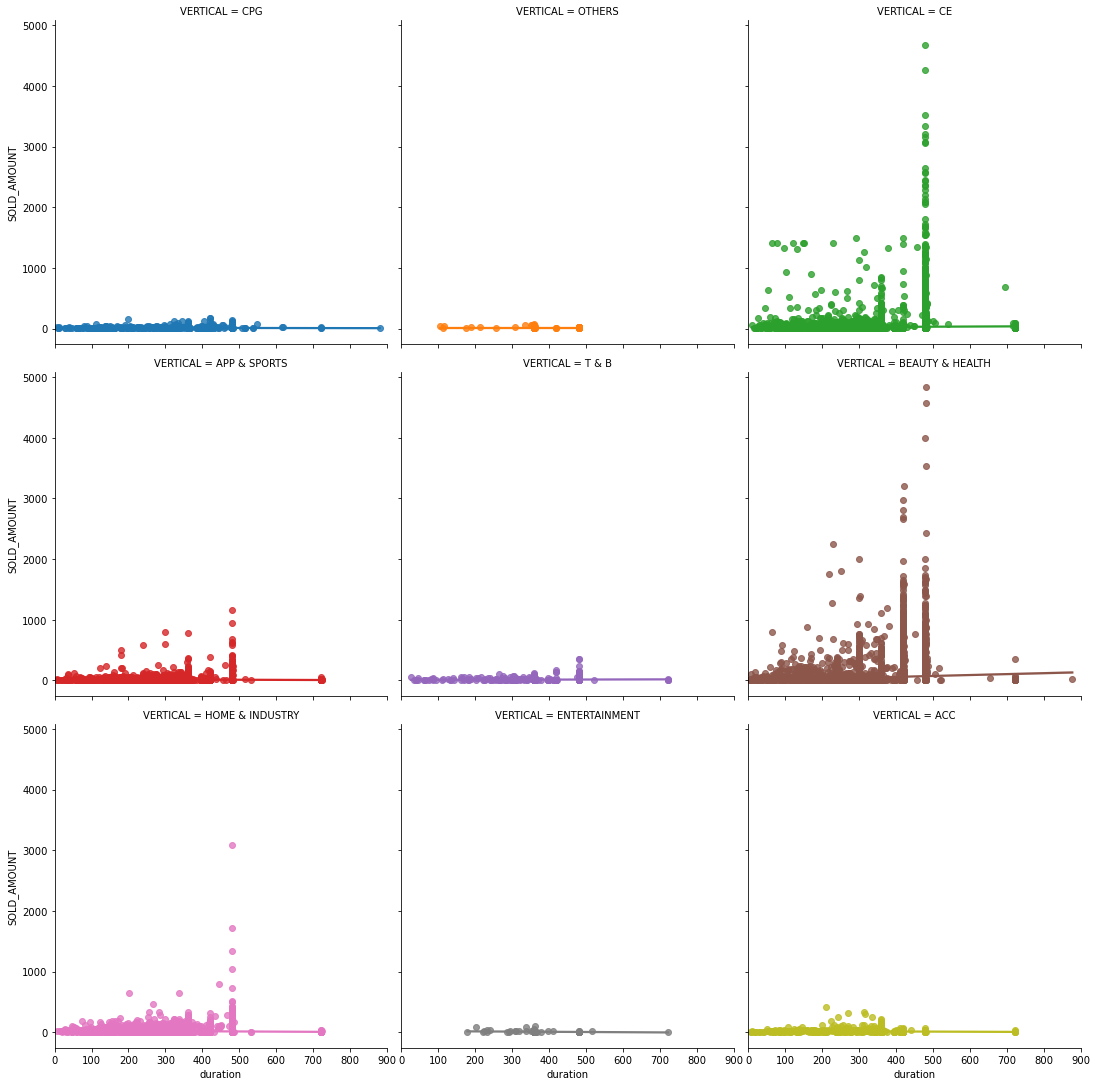

In [48]:
sns.lmplot(data=df, x="duration", y="SOLD_AMOUNT", hue="VERTICAL", col='VERTICAL',robust=True, col_wrap=3)
plt.xlim([0,900])

Fitting a linear regression on the Sold Amount by duration data shows that specially in the Beauty & health and the CE verticals, there are a positive correlation between these variables. Indicating that increasing the duration of offers of products in these areas would have a greater impact in sales.

But it also could be that these verticals have more stock of products to be sold and increasing the duration would naturally lead to more sales.

(0.0, 100.0)

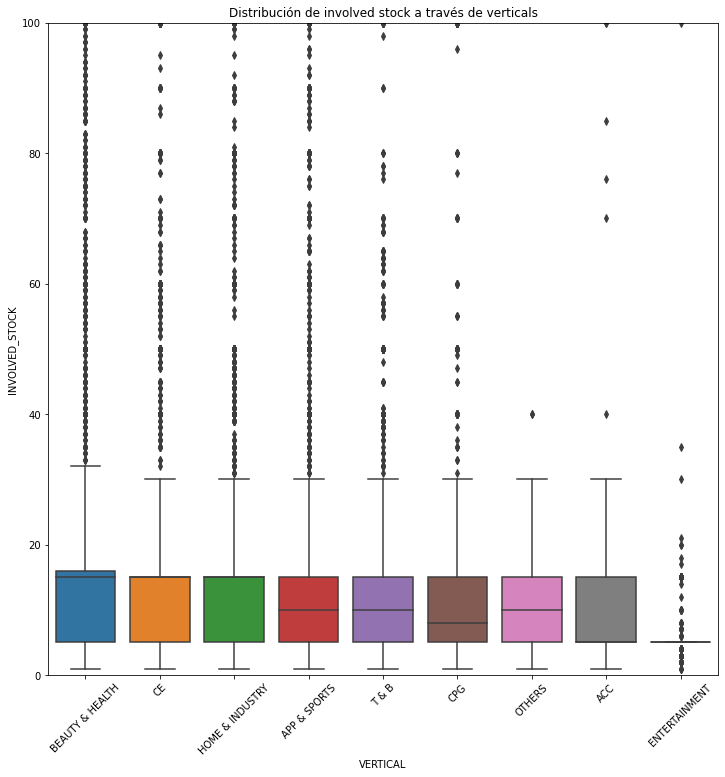

In [58]:
my_order = df.groupby(by=["VERTICAL"])["INVOLVED_STOCK"].mean().sort_values().iloc[::-1].index

plt.figure(figsize=(12,12))
plt.xticks(rotation=45)
sns.boxplot(x="VERTICAL", y="INVOLVED_STOCK",data=df,order=my_order)
plt.title('Distribución de involved stock a través de verticals')
plt.ylim([0,100])

In [47]:
df.groupby(by=["VERTICAL"])["INVOLVED_STOCK"].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
VERTICAL,,,,,,,,
ENTERTAINMENT,525.0,6.032381,5.456359,1.0,5.0,5.0,5.0,100.0
ACC,2573.0,9.565099,7.587805,1.0,5.0,5.0,15.0,200.0
OTHERS,279.0,10.394265,5.778474,1.0,5.0,10.0,15.0,40.0
CPG,2714.0,14.723287,31.518523,1.0,5.0,8.0,15.0,500.0
T & B,2624.0,16.695122,33.481299,1.0,5.0,10.0,15.0,800.0
APP & SPORTS,13241.0,18.122347,95.068151,1.0,5.0,10.0,15.0,6000.0
HOME & INDUSTRY,11011.0,20.907002,55.782923,1.0,5.0,15.0,15.0,1500.0
CE,8629.0,24.500753,82.065260,1.0,5.0,15.0,15.0,2000.0
BEAUTY & HEALTH,7150.0,127.335524,500.926306,1.0,5.0,15.0,16.0,9000.0


The distribuition of stock among the verticals stays pretty similar, with the exception of BEAUTY & HEALTH that has a greater mean and std deviation. Corroborating with the hypotesis before

The hypotesis is that relanpago offers of products belonging to the CE and BEAUTY & HEALTH verticals need more time because people need more time to think about it, before buying. Access to more data and A/B testing are needed to improve the confidence of this hypotesis.

In [51]:
df['dayofweek'] = df['OFFER_START_DTTM'].dt.dayofweek

(0.0, 2.0)

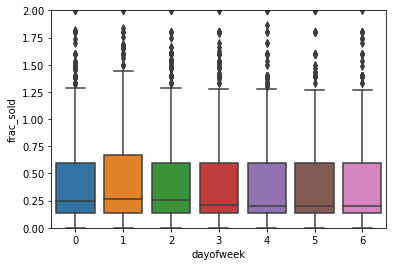

In [55]:
sns.boxplot(x='dayofweek',y='frac_sold',data=df)
plt.ylim([0,2])

In the above graph, 0 represent Monday and 6 represent Sunday.

It seems that offers begining on Tuesday usually have more of its stock bought